In [23]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import random
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import expand_dims, argmax

%matplotlib inline

### **Pre-processing Potsdam dataset**

In [24]:
flat_random = random.sample(range(1, 4000), 200)
gable_random = random.sample(range(1, 4000), 200)
hip_random = random.sample(range(1, 4000), 200)
print(flat_random)
print(gable_random)
print(hip_random)

[3319, 1307, 3194, 692, 2388, 149, 3, 790, 1057, 1921, 2062, 2485, 1171, 83, 45, 115, 2116, 7, 3304, 2291, 79, 2883, 2165, 3931, 2197, 1785, 583, 2515, 3640, 2379, 587, 2900, 2584, 2350, 3836, 1824, 3503, 3925, 304, 3641, 3876, 2474, 1367, 2625, 127, 1716, 2775, 2038, 2532, 244, 3865, 2102, 3540, 2343, 473, 2117, 2274, 1520, 2286, 784, 2989, 1494, 2509, 3167, 3106, 3120, 2995, 1394, 3426, 3124, 3729, 2875, 1620, 355, 3337, 917, 2223, 2525, 2893, 1332, 248, 3087, 246, 1692, 2131, 3898, 939, 162, 1977, 2507, 594, 2950, 2194, 2513, 2812, 385, 1961, 1412, 1333, 42, 1807, 39, 786, 2114, 705, 337, 1695, 3930, 731, 2268, 2526, 2089, 235, 2895, 700, 2311, 2926, 688, 2519, 3590, 2799, 3401, 3981, 2880, 824, 610, 1860, 482, 2043, 2871, 3250, 2653, 783, 2609, 1234, 828, 1159, 533, 2488, 552, 270, 1492, 655, 831, 1309, 937, 410, 1361, 1248, 2913, 3710, 3792, 2042, 2874, 153, 413, 2458, 1799, 829, 400, 1213, 3862, 3468, 736, 3131, 3133, 1132, 3270, 3100, 2654, 1589, 3642, 3670, 798, 54, 3607, 1325,

In [25]:
potsdam_image_paths_list = []
potsdam_image_labels = []
image_path_flat = '../input/potsdam-full/potsdam-roofs/Dataset 2/Flat/'
image_path_gable = '../input/potsdam-full/potsdam-roofs/Dataset 2/Gable/'
image_path_hip = '../input/potsdam-full/potsdam-roofs/Dataset 2/Hip/'

for i in range(len(flat_random)):
    potsdam_image_paths_list.append(image_path_flat + "Flat" + str(flat_random[i]) + ".tif")
    potsdam_image_labels.append(0)
    
for i in range(len(gable_random)):
    potsdam_image_paths_list.append(image_path_gable + "Gable" + str(gable_random[i]) + ".tif")
    potsdam_image_labels.append(1)
    
for i in range(len(hip_random)):
    potsdam_image_paths_list.append(image_path_hip + "Hip" + str(hip_random[i]) + ".tif")
    potsdam_image_labels.append(2)
# print(image_paths_list)

In [26]:
# potsdam_image_paths_list = []
# potsdam_image_labels = []
# potsdam_image_path_flat = '../input/potsdam-mini/potsdam-mini/Flat'   # 0
# potsdam_image_path_gable = '../input/potsdam-mini/potsdam-mini/Gable' # 1
# potsdam_image_path_hip = '../input/potsdam-mini/potsdam-mini/Hip'     # 2



# for img_path in glob.glob(os.path.join(potsdam_image_path_flat, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(0)

# for img_path in glob.glob(os.path.join(potsdam_image_path_gable, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path))
#     potsdam_image_labels.append(1)

# for img_path in glob.glob(os.path.join(potsdam_image_path_hip, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(2)
    
# potsdam_image_paths_list.sort()
# assert(len(potsdam_image_paths_list) == 300 and len(potsdam_image_labels) == 300)

In [27]:
zipped_list = list(zip(potsdam_image_paths_list, potsdam_image_labels))
random.shuffle(zipped_list)
potsdam_image_paths_list, potsdam_image_labels = zip(*zipped_list)
potsdam_image_paths_list, potsdam_image_labels = list(potsdam_image_paths_list), list(potsdam_image_labels)

In [28]:
# mini_image_paths_list = []
# mini_labels = []

# for i in range(0,10,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(0)
    
# for i in range(100,110,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(1)
    
# for i in range(200,210,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(2)
    
# print(mini_image_paths_list)
# print(mini_labels)

In [29]:
# train_X_potsdam = []
# train_Y_potsdam = []
# for i, img in enumerate(mini_image_paths_list):
#     img = cv2.imread(img, cv2.IMREAD_COLOR)
#     resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
#     train_X_potsdam.append(resized_img)
    
# train_Y_potsdam = mini_labels

train_X_potsdam = []
train_Y_potsdam = []
for i, img in enumerate(potsdam_image_paths_list):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    train_X_potsdam.append(resized_img)
    
train_Y_potsdam = potsdam_image_labels

In [30]:
train_X_potsdam = np.array(train_X_potsdam)
train_Y_potsdam = np.array(train_Y_potsdam)

train_X_potsdam = train_X_potsdam.astype('float32')
train_X_potsdam /= 255.
train_Y_potsdam = train_Y_potsdam.reshape(train_Y_potsdam.shape[0],1)
train_Y_potsdam = to_categorical(train_Y_potsdam, num_classes = 3)

print(train_X_potsdam.shape, train_Y_potsdam.shape)

(600, 256, 256, 3) (600, 3)


### **Make predictions**

In [31]:
def make_predictions(model, test_X, test_Y):
    test_loss = model.evaluate(test_X, test_Y)
    predictions = model.predict(test_X)
    pred_labels = np.argmax(predictions, axis = 1)
    test_labels = np.argmax(test_Y, axis = 1)
    return pred_labels, test_labels

### **Plot confusion matrix**

In [32]:
def plot_confusion_matrix(test_labels, pred_labels):
    Y_test_actual = test_labels
    Y_test_pred = pred_labels
    confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

    f,ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = '.1f', ax = ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

### **Classification Report**

In [33]:
def print_classification_report(test_labels, pred_labels):
    print("Classification Report: ")
    print(classification_report(test_labels, pred_labels))

### **Plot AUC-ROC graph**

In [34]:
def plot_AUC_ROC(model, test_X, test_Y):

    predictions = model.predict(test_X) 
    print(predictions)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print("ROC_AUC score for 3 models: {0}".format(roc_auc))

    # Plot of a ROC curve for a specific class
    for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

### **TTA**

In [35]:
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    # convert image into dataset
    samples = expand_dims(image, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=0)
    # sum across predictions
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    return argmax(summed)

In [36]:
# evaluate a model on a dataset using test-time augmentation
def tta_evaluate_model(model, test_X, test_Y):
    # configure image data augmentation
    datagen = ImageDataGenerator( rotation_range = 7,  # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range = 0.10,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range = 0.10,  # randomly shift images vertically (fraction of total height)
                                  horizontal_flip = True,  # randomly flip images
                                  vertical_flip = True,   # randomly flip images
                                  fill_mode = 'reflect')
    # define the number of augmented images to generate per test set image
    n_examples_per_image = 5
    yhats = list()
    for i in range(len(test_X)):
        # make augmented prediction
        yhat = tta_prediction(datagen, model, test_X[i], n_examples_per_image)
        # store for evaluation
        yhats.append(yhat)
    # calculate accuracy
    print(yhats)
    testY_labels = argmax(test_Y, axis=1)
    acc = accuracy_score(testY_labels, yhats)
    print_classification_report(test_labels, pred_labels)
    plot_confusion_matrix(testY_labels, yhats)
    return acc, yhats

### **Testing on ResNet model**

19/19 [==============================] - 2s 80ms/step - loss: 1.7500 - acc: 0.6683
[2 0 2 2 0 2 0 1 0 2 0 0 2 2 0 0 1 0 0 0 1 0 2 1 0 0 0 1 1 1 0 2 0 0 0 1 2
 0 1 1 1 0 1 2 1 2 0 0 1 1 0 1 1 2 0 2 0 0 0 2 0 2 1 2 0 2 0 0 1 0 1 0 0 0
 2 2 0 0 0 1 0 0 1 2 1 1 1 2 1 2 1 2 0 1 2 1 1 0 0 0 1 1 2 1 0 2 0 1 1 0 1
 1 0 0 0 0 2 1 1 0 0 0 0 2 1 1 1 1 0 0 2 0 0 1 0 1 1 1 0 0 2 1 0 2 0 0 0 1
 2 0 0 0 0 0 1 0 0 0 0 2 1 2 2 0 1 2 0 0 0 1 1 0 1 1 1 1 2 0 1 1 1 0 1 1 1
 0 1 0 2 0 1 1 2 2 1 0 1 0 0 2 0 2 1 0 0 1 1 1 0 2 2 2 1 0 0 1 2 1 0 2 2 0
 1 2 2 0 0 0 1 1 1 1 0 1 2 0 1 2 0 1 1 0 0 1 2 0 0 1 0 2 1 1 1 2 1 0 0 0 1
 1 0 0 1 0 1 0 2 1 0 1 1 1 1 1 0 2 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 0 2 0 0 0 1 1 0 0 0 0 2 1 1 0 0 0 1 2 0 2 0 1 0 2 0 0 0 0 2 0 0 0 1 2 2 1
 0 2 2 2 1 2 0 0 0 0 0 0 0 0 2 0 1 2 1 2 0 0 0 1 0 1 1 0 0 2 2 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 2 0 0 1 0 1 0 1 0 1 0 2 0 2 2 0 2 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 2 0 1 1 2 0 1 0 1 2 1 1 1 0 1 1 1 2 0 2 0 1 2 0 2 1 0 1 2 1 0 1 0 1 1
 0 2 1 0 2 1 0 2 

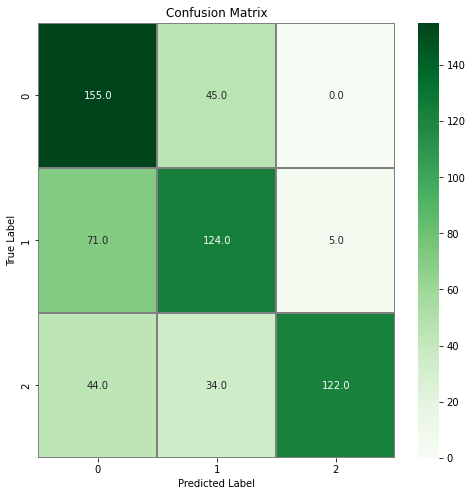

[[3.1054944e-06 1.5651651e-06 9.9999535e-01]
 [9.9905914e-01 9.3723490e-04 3.5540615e-06]
 [3.0564782e-01 2.3639522e-01 4.5795694e-01]
 ...
 [9.7323179e-01 2.1118600e-02 5.6496444e-03]
 [7.1026909e-01 2.8886536e-01 8.6559338e-04]
 [5.6627556e-04 5.1505254e-03 9.9428314e-01]]
ROC_AUC score for 3 models: {0: 0.81245, 1: 0.7966625, 2: 0.8387625000000001}


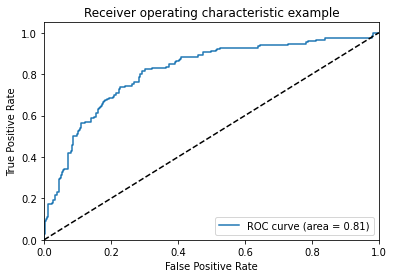

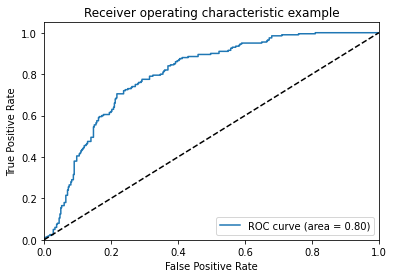

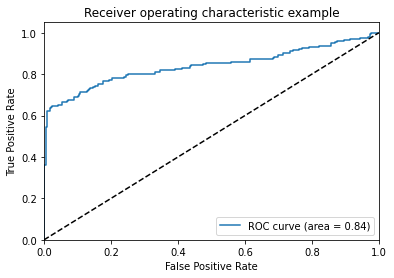

In [37]:
ResNet = tf.keras.models.load_model('../input/weights-50epochs-mod-dataset/weights-50epochs-mod-dataset/ResNet50-50epochs-bs8')
test_loss_ResNet = ResNet.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_ResNet = ResNet.predict(train_X_potsdam)
pred_labels_ResNet = np.argmax(predictions_ResNet, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_ResNet)
print(test_labels)
print(test_loss_ResNet)
print_classification_report(test_labels, pred_labels_ResNet)
plot_confusion_matrix(test_labels, pred_labels_ResNet)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with ResNet**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 

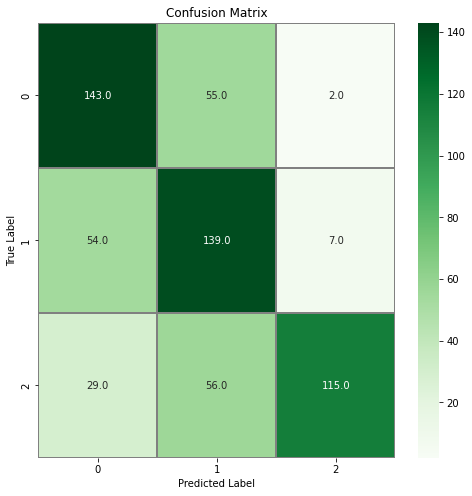

0.6616666666666666


In [38]:
acc_ResNet_TTA, yhats_ResNet_TTA = tta_evaluate_model(ResNet, train_X_potsdam, train_Y_potsdam)
print(acc_ResNet_TTA)

### **Testing with shallow CNN**

19/19 [==============================] - 1s 53ms/step - loss: 1.3984 - acc: 0.4767
[2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 0 2 2 2 1 2 2 2 2 2 0 0 2 2 2 0 2 0 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 0
 2 2 2 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 1 2 2 0 2 0 2 1
 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 1 0 2 1 2 0 2 2 2 2 2 2 0 2 0 0 2 2 1 0 2 2 2 2 0 2 2 2 2 0 2 0 2
 0 2 2 2 2 2 2 2 2 0 2 0 2 0 2 1 2 2 0 0 2 2 2 0 2 2 2 2 1 0 2 2 1 2 2 2 2
 2 2 2 0 2 1 2 2 2 2 0 0 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 1 0 2 2 2 2 2 2 0 2 2 0 2 0 2 1 2 1 0 2 0 2 2 2
 0 2 0 1 0 2 2 0 2 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 1 2 2 2 2
 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 2 2
 2 2 2 0 2 2 1 2 2 0 2 2 0 2 2 2 2 1 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 1 2 0 2 2 2 0 0 2 2 0 2 2 2 2 1 2 2 0 2 0 2 2 2 1 2 0 2 2 2
 0 2 0 0 2 2 0 2 

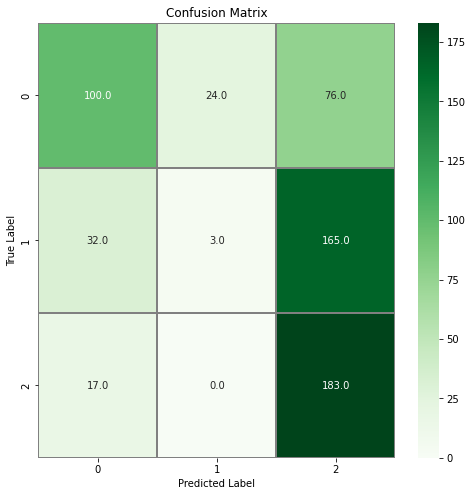

[[3.1054944e-06 1.5651651e-06 9.9999535e-01]
 [9.9905914e-01 9.3723490e-04 3.5540615e-06]
 [3.0564782e-01 2.3639522e-01 4.5795694e-01]
 ...
 [9.7323179e-01 2.1118600e-02 5.6496444e-03]
 [7.1026909e-01 2.8886536e-01 8.6559338e-04]
 [5.6627556e-04 5.1505254e-03 9.9428314e-01]]
ROC_AUC score for 3 models: {0: 0.81245, 1: 0.7966625, 2: 0.8387625000000001}


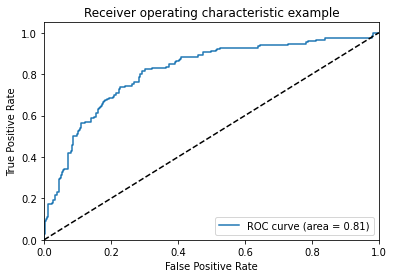

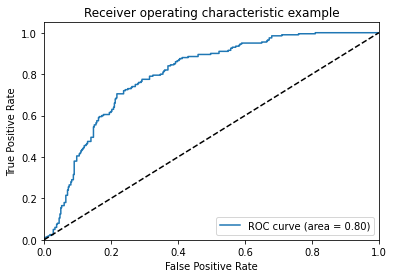

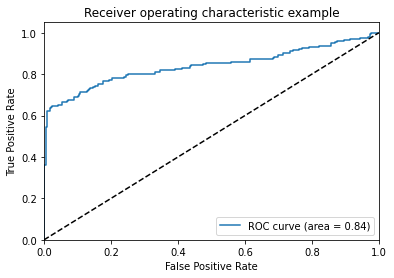

In [39]:
CNN = tf.keras.models.load_model('../input/weights-50epochs-mod-dataset/weights-50epochs-mod-dataset/CNN-RMSProp-50epochs')
test_loss_CNN = CNN.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_CNN = CNN.predict(train_X_potsdam)
pred_labels_CNN = np.argmax(predictions_CNN, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_CNN)
print(test_labels)
print(test_loss_CNN)
print_classification_report(test_labels, pred_labels_CNN)
plot_confusion_matrix(test_labels, pred_labels_CNN)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with shallow CNN**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 

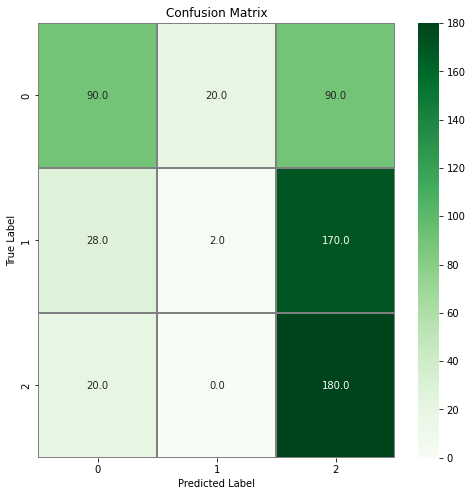

0.4533333333333333


In [40]:
acc_CNN, yhats_CNN = tta_evaluate_model(CNN, train_X_potsdam, train_Y_potsdam)
print(acc_CNN)

### **Testing with EfficientNetB4 - RMS Prop**

19/19 [==============================] - 5s 121ms/step - loss: 0.9020 - acc: 0.6717
[2 2 0 2 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 0 2 0 0 0 0 1
 0 0 0 0 1 1 2 2 2 2 0 0 2 0 1 0 2 0 2 0 0 0 2 0 2 1 2 0 2 0 0 1 0 1 0 0 0
 2 1 0 0 0 0 0 2 0 2 1 1 1 2 0 1 0 1 0 0 2 1 0 0 0 0 0 0 2 0 2 2 0 2 0 0 0
 0 1 2 0 2 2 0 0 0 0 1 1 2 0 2 2 1 0 0 2 0 2 1 0 0 0 1 0 2 2 0 0 2 0 0 0 1
 2 0 0 0 0 0 2 0 0 0 0 2 2 2 2 0 0 2 0 0 0 0 0 0 0 1 2 0 2 2 2 2 2 0 0 2 2
 1 1 0 2 0 1 0 2 2 0 1 2 0 0 2 0 1 0 0 0 1 0 2 0 2 2 2 2 0 0 0 1 0 0 2 2 2
 0 2 2 0 1 0 0 2 1 1 0 0 1 1 1 2 0 1 0 0 0 2 2 2 0 1 1 2 1 2 1 2 0 0 0 0 0
 1 1 2 0 0 0 0 2 2 0 1 2 0 1 2 0 2 0 0 2 1 2 2 0 0 1 0 0 0 0 0 0 2 0 2 2 0
 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 1 2 0 1 0 2 0 1 0 0 2 0 0 0 0 2 1 0
 0 1 2 2 2 2 0 0 0 0 2 1 2 1 1 0 1 2 1 2 0 0 0 2 0 1 1 1 2 2 2 0 0 0 0 2 1
 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 2 1 1 1 0 0 0 0 1 0 1 0 0 2 2 2
 2 0 2 0 0 2 2 0 0 0 2 2 0 0 0 0 1 0 0 2 2 2 0 0 2 0 2 1 1 2 2 0 0 0 2 0 1
 0 2 0 0 2 0 0 2

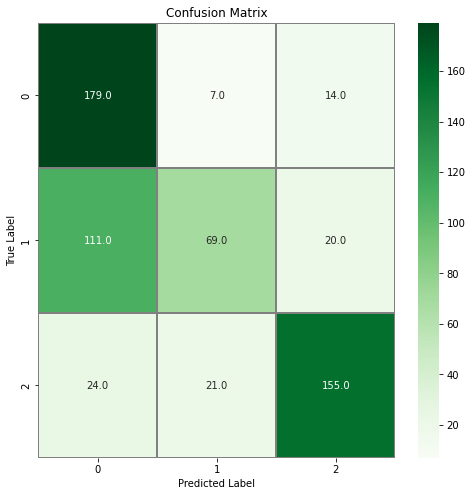

[[3.1054944e-06 1.5651651e-06 9.9999535e-01]
 [9.9905914e-01 9.3723490e-04 3.5540615e-06]
 [3.0564782e-01 2.3639522e-01 4.5795694e-01]
 ...
 [9.7323179e-01 2.1118600e-02 5.6496444e-03]
 [7.1026909e-01 2.8886536e-01 8.6559338e-04]
 [5.6627556e-04 5.1505254e-03 9.9428314e-01]]
ROC_AUC score for 3 models: {0: 0.81245, 1: 0.7966625, 2: 0.8387625000000001}


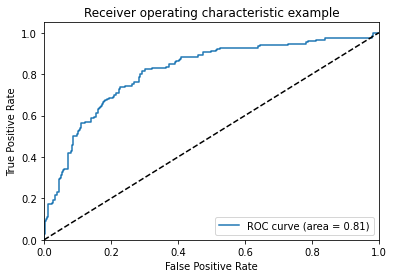

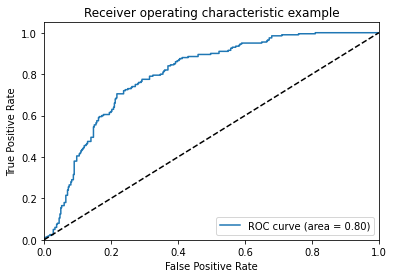

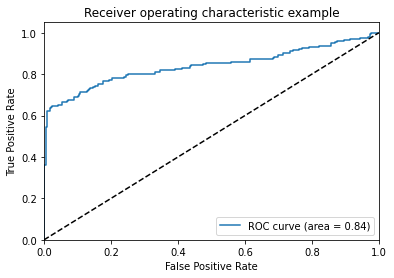

In [41]:
EfficientNetRMS = tf.keras.models.load_model('../input/weights-50epochs-mod-dataset/weights-50epochs-mod-dataset/EfficientNetB4-50epochs-bs16-RMS')
test_loss_EfficientNetRMS = EfficientNetRMS.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetRMS = EfficientNetRMS.predict(train_X_potsdam)
pred_labels_EfficientNetRMS = np.argmax(predictions_EfficientNetRMS, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetRMS)
print(test_labels)
print(test_loss_EfficientNetRMS)
print_classification_report(test_labels, pred_labels_EfficientNetRMS)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetRMS)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - RMS Prop**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 

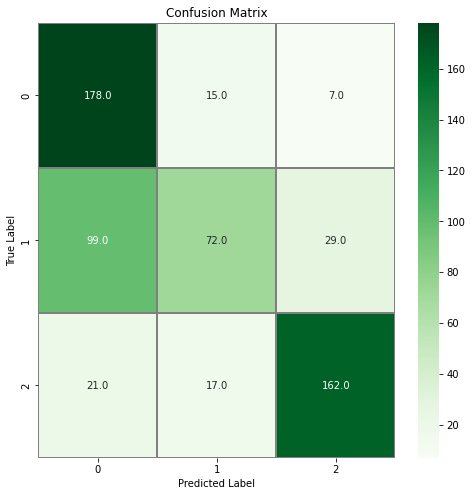

0.6866666666666666


In [42]:
acc_EfficientNetRMS, yhats_EfficientNetRMS = tta_evaluate_model(EfficientNetRMS, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetRMS)

### **Testing with EfficientNetB4 - Adam**

19/19 [==============================] - 5s 120ms/step - loss: 0.9769 - acc: 0.6500
[2 0 1 2 0 2 0 1 0 2 1 0 2 2 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1
 0 0 0 0 1 1 2 1 0 0 0 0 2 0 1 0 2 0 0 0 0 0 1 0 2 1 2 0 2 0 0 0 0 1 0 0 0
 2 1 0 0 0 0 0 0 0 2 0 0 1 2 1 1 0 1 0 1 2 1 0 0 2 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 2 1 2 2 0 0 0 0 1 1 2 0 1 1 1 0 0 2 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1
 2 0 0 0 0 0 1 0 0 0 0 2 1 2 2 0 0 2 0 0 0 0 0 0 0 1 2 0 2 0 0 1 2 0 0 0 2
 0 1 0 2 0 1 1 2 2 0 0 2 0 0 2 0 1 1 0 0 1 0 1 0 2 2 2 1 0 0 1 2 0 0 2 2 1
 1 2 2 0 0 0 0 1 1 1 0 0 1 1 1 2 0 1 0 0 0 2 0 0 0 1 1 1 1 1 1 2 1 0 0 0 1
 0 1 0 0 0 1 0 2 1 0 0 2 0 0 1 0 2 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 1 2 0 0 0 2 0 1 0 0 0 0 2 0 2 0 1 0 2 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 2 2 0 2 1 0 0 0 0 0 1 1 2 0 1 2 1 2 0 0 0 2 0 1 1 0 2 0 2 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 2 1 1 2 0 1 0 0 1 0 0 0 0 1 0 1
 2 0 2 0 0 1 2 0 0 0 2 2 0 0 0 0 1 0 1 1 0 2 0 0 1 0 0 1 1 2 2 0 0 0 1 0 1
 0 0 0 0 2 1 0 2

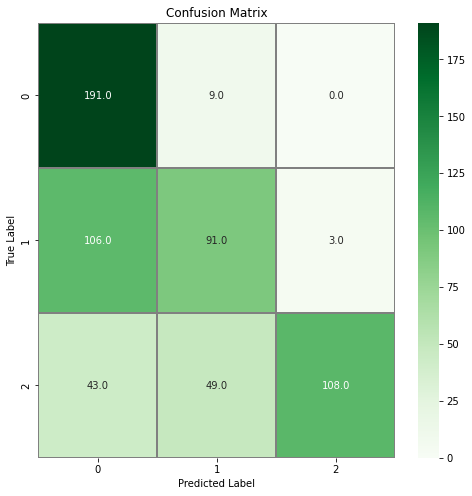

[[3.1054944e-06 1.5651651e-06 9.9999535e-01]
 [9.9905914e-01 9.3723490e-04 3.5540615e-06]
 [3.0564782e-01 2.3639522e-01 4.5795694e-01]
 ...
 [9.7323179e-01 2.1118600e-02 5.6496444e-03]
 [7.1026909e-01 2.8886536e-01 8.6559338e-04]
 [5.6627556e-04 5.1505254e-03 9.9428314e-01]]
ROC_AUC score for 3 models: {0: 0.81245, 1: 0.7966625, 2: 0.8387625000000001}


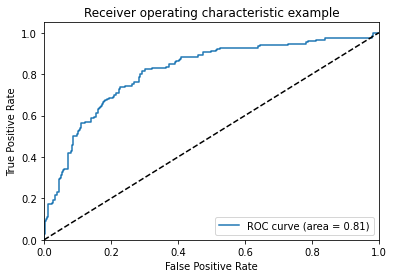

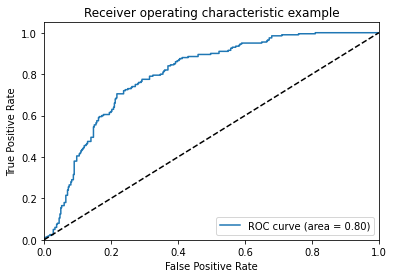

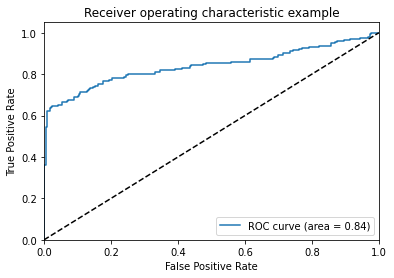

In [43]:
EfficientNetAdam = tf.keras.models.load_model('../input/weights-50epochs-mod-dataset/weights-50epochs-mod-dataset/EfficientNetB4-50epochs-bs16-Adam')
test_loss_EfficientNetAdam = EfficientNetAdam.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetAdam = EfficientNetAdam.predict(train_X_potsdam)
pred_labels_EfficientNetAdam = np.argmax(predictions_EfficientNetAdam, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetAdam)
print(test_labels)
print(test_loss_EfficientNetAdam)
print_classification_report(test_labels, pred_labels_EfficientNetAdam)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetAdam)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - Adam**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 

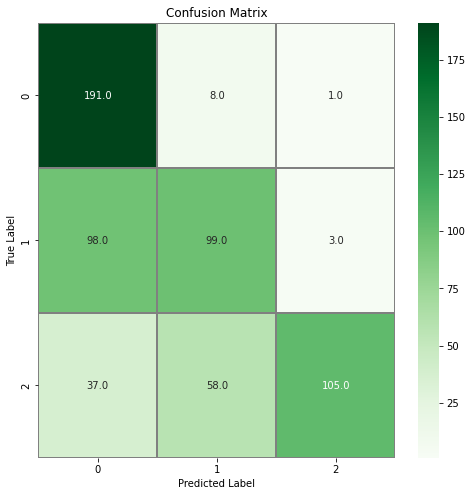

0.6583333333333333


In [44]:
acc_EfficientNetAdam, yhats_EfficientNetAdam = tta_evaluate_model(EfficientNetAdam, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetAdam)

### **Testing with VGG**

19/19 [==============================] - 2s 81ms/step - loss: 1.7114 - acc: 0.6517
[0 0 0 1 0 2 0 0 0 2 0 2 0 0 2 2 2 2 0 1 0 1 2 2 2 0 0 0 0 0 0 0 2 0 0 2 0
 0 2 0 2 2 0 0 2 0 0 1 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 2 1 0 0 2 0 2
 0 0 0 1 0 2 0 0 2 0 0 2 0 0 1 2 0 2 1 0 0 0 0 0 0 0 2 0 0 0 2 0 1 0 2 2 1
 0 0 0 0 0 0 1 2 0 1 0 0 0 2 1 0 2 0 0 0 2 2 0 0 0 0 1 0 2 2 1 2 1 0 0 0 1
 0 0 1 0 0 2 0 2 0 2 2 2 2 2 0 0 2 0 2 2 2 2 0 2 1 0 0 1 0 2 0 2 2 1 0 0 2
 1 2 0 0 0 2 0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 2 0 2 2 0 2 1 1 0 1 0 2 0 0 0 0
 0 0 0 0 2 0 1 0 0 0 2 0 0 1 0 2 2 0 2 0 2 0 2 0 0 2 0 2 0 2 0 0 0 0 0 2 2
 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 2 1 0 0 0 2 2 0 2 0 0 2 0 0 0 0 1 1 0 0
 0 2 0 2 1 0 0 0 2 2 0 0 1 0 0 2 2 0 0 0 0 0 1 0 2 2 1 0 1 0 2 0 0 0 2 2 0
 0 1 0 0 0 2 0 0 2 0 0 0 2 0 1 0 1 0 0 0 2 1 2 1 0 0 1 1 0 1 2 0 1 2 2 2 0
 0 1 0 2 0 2 0 0 0 1 0 1 1 1 0 1 0 0 2 2 2 0 0 0 0 1 0 0 0 0 0 1 2 2 0 0 2
 1 2 2 0 0 0 2 0 0 1 0 0 1 2 2 0 0 0 0 2 0 1 0 0 0 0 1 2 2 0 0 0 0 0 0 0 2
 0 0 0 2 0 0 2 2 

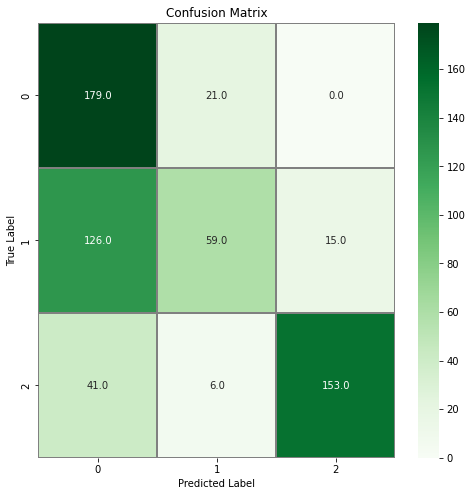

[[3.1054944e-06 1.5651651e-06 9.9999535e-01]
 [9.9905914e-01 9.3723490e-04 3.5540615e-06]
 [3.0564782e-01 2.3639522e-01 4.5795694e-01]
 ...
 [9.7323179e-01 2.1118600e-02 5.6496444e-03]
 [7.1026909e-01 2.8886536e-01 8.6559338e-04]
 [5.6627556e-04 5.1505254e-03 9.9428314e-01]]
ROC_AUC score for 3 models: {0: 0.81245, 1: 0.7966625, 2: 0.8387625000000001}


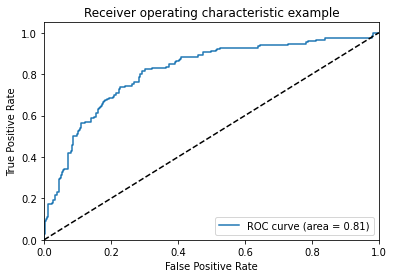

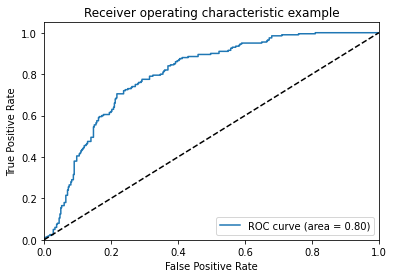

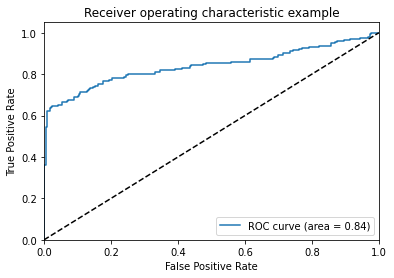

In [45]:
VGG = tf.keras.models.load_model('../input/weights-50epochs-mod-dataset/weights-50epochs-mod-dataset/VGG16-50epochs-RMS-bs4')
test_loss_VGG = VGG.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_VGG = VGG.predict(train_X_potsdam)
pred_labels_VGG = np.argmax(predictions_VGG, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels)
print(test_labels)
print(test_loss_VGG)
print_classification_report(test_labels, pred_labels_VGG)
plot_confusion_matrix(test_labels, pred_labels_VGG)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with VGG**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 

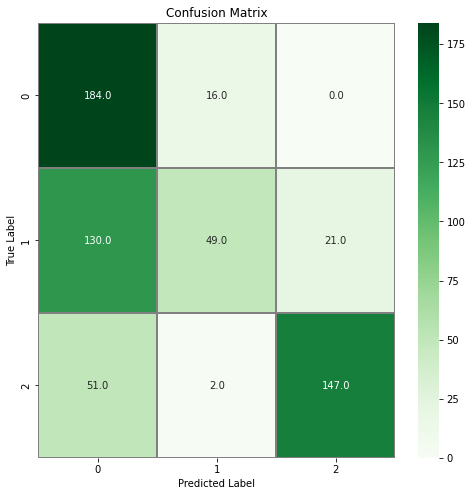

0.6333333333333333


In [46]:
acc_VGG, yhats_VGG = tta_evaluate_model(VGG, train_X_potsdam, train_Y_potsdam)
print(acc_VGG)

### **Majority Voting**

- Combining ResNet, EfficientNet-RMSProp, EfficientNet-Adam
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max


In [65]:
def max_voting(preds):
    idxs = np.argmax(preds, axis = 1)
    return np.take_along_axis(preds, idxs[:,None], axis = 1)

Shape of combined results: (600, 3)


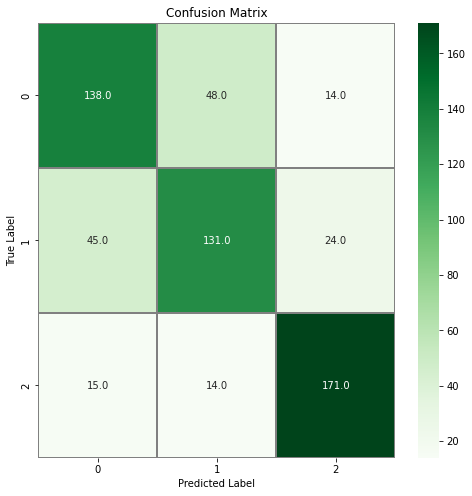

0.7333333333333333


In [72]:
combined_preds_ree = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_EfficientNetAdam[i]
    combined_preds_ree.append([res1, res2, res3])
    

combined_preds_ree = np.array(combined_preds_ree)
print("Shape of combined results: {0}".format(combined_preds_ree.shape))

pred_results_ree = max_voting(combined_preds_ree)

plot_confusion_matrix(test_labels, pred_results_ree)
print(accuracy_score(test_labels, pred_results_ree))

- Combining ResNet, EfficientNet-RMSProp, VGG
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


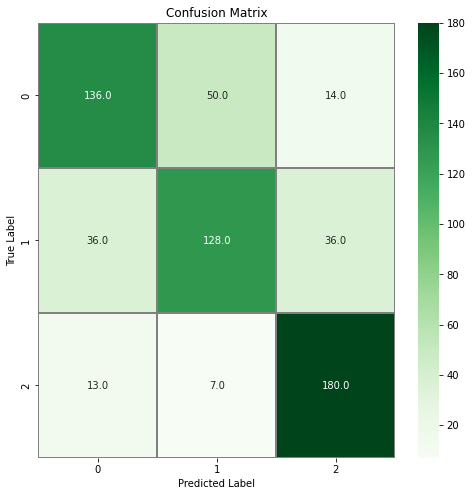

0.74


In [71]:
combined_preds_rev = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_VGG[i]
    combined_preds_rev.append([res1, res2, res3])
    

combined_preds_rev = np.array(combined_preds_rev)
print("Shape of combined results: {0}".format(combined_preds_rev.shape))

pred_results_rev = max_voting(combined_preds_rev)

plot_confusion_matrix(test_labels, pred_results_rev)
print(accuracy_score(test_labels, pred_results_rev))

- Combining ResNet, EfficientNet-RMSProp, CNN
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


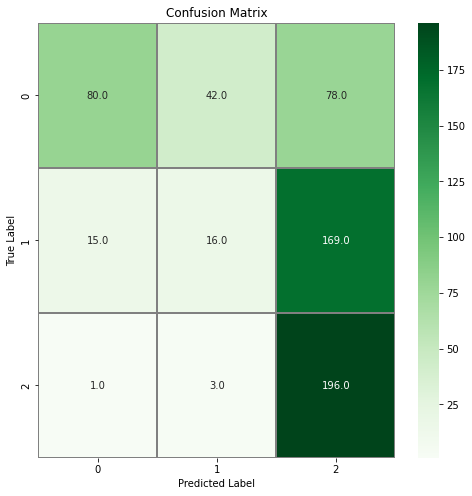

0.4866666666666667


In [70]:
combined_preds_rec = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_CNN[i]
    combined_preds_rec.append([res1, res2, res3])
    

combined_preds_rec = np.array(combined_preds_rec)
print("Shape of combined results: {0}".format(combined_preds_rec.shape))

pred_results_rec = max_voting(combined_preds_rec)

plot_confusion_matrix(test_labels, pred_results_rec)
print(accuracy_score(test_labels, pred_results_rec))